In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
'''import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/pasta_principal/Civic.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/pasta_principal') # Descompacta para a pasta 'pasta_principal'
'''

"import zipfile\nwith zipfile.ZipFile('/content/drive/MyDrive/pasta_principal/Civic.zip', 'r') as zip_ref:\n    zip_ref.extractall('/content/drive/MyDrive/pasta_principal') # Descompacta para a pasta 'pasta_principal'\n"

In [ ]:
import os
import pandas as pd
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Montar o Google Drive (se necessário)
drive.mount('/content/drive')

# Caminho base para as imagens
base_path = '/content/drive/MyDrive/pasta_principal/Civic'

# Listas de anos e cores
anos = [1990, 2000, 2001, 2002, 2004, 2005, 2009, 2010, 2011, 2012, 2013, 2014, 2019]
cores = ['Black', 'Grey', 'White']

# Inicializar listas para armazenar os dados
filenames = []
classes = []

# Iterar sobre os anos e cores para coletar os dados
for ano in anos:
    for cor in cores:
        folder_path = os.path.join(base_path, str(ano), cor)
        if os.path.exists(folder_path):
            for filename in os.listdir(folder_path):
                image_path = os.path.join(folder_path, filename)
                filenames.append(image_path)
                classes.append(cor)

# Criar o DataFrame
df = pd.DataFrame({'filename': filenames, 'class': classes})

# Criar geradores de dados de imagem para treinamento e validação
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)

# Usar flow_from_dataframe com o DataFrame 'df'
train_generator = train_datagen.flow_from_dataframe(
    dataframe=df,
    x_col="filename",
    y_col="class",
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_dataframe(
    dataframe=df,
    x_col="filename",
    y_col="class",
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 2041 validated image filenames belonging to 3 classes.
Found 2041 validated image filenames belonging to 3 classes.


In [ ]:
# Criar o modelo de Deep Learning
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(cores), activation='softmax')  # Número de neurônios de saída = número de classes (cores)
])

# Compilar o modelo
model.compile(loss='categorical_crossentropy',  # Usar 'categorical_crossentropy' para múltiplas classes
              optimizer='adam',
              metrics=['accuracy'])

# Treinar o modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # Número de épocas de treinamento
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.4429 - loss: 1.5121 - val_accuracy: 0.6344 - val_loss: 0.7823
Epoch 2/10
 1/63 ━━━━━━━━━━━━━━━━━━━━ 1:43 2s/step - accuracy: 0.6562 - loss: 0.8114

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.6562 - loss: 0.8114 - val_accuracy: 0.7200 - val_loss: 0.7608
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.7156 - loss: 0.6630 - val_accuracy: 0.7872 - val_loss: 0.5295
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8125 - loss: 0.4193 - val_accuracy: 0.9200 - val_loss: 0.3513
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.8025 - loss: 0.4841 - val_accuracy: 0.7971 - val_loss: 0.4680
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - accuracy: 0.8125 - loss: 0.4344 - val_accuracy: 0.8000 - val_loss: 0.5759
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.8457 - loss: 0.3965 - val_accuracy: 0.8601 - val_loss: 0.3710
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8750 - loss: 0.3437 - val_accuracy: 0.8800 - val_loss: 0.3234
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.8510 - loss: 0.3986 - val_accuracy: 0.8983 - val_loss: 0.28

In [ ]:
# Avaliar o modelo
validation_steps = 63  # Número de passos de validação calculado
loss, accuracy = model.evaluate(validation_generator, steps=validation_steps)
print('Loss:', loss)
print('Accuracy:', accuracy)

63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 540ms/step - accuracy: 0.9054 - loss: 0.2677
Loss: 0.2817007303237915
Accuracy: 0.8983134627342224


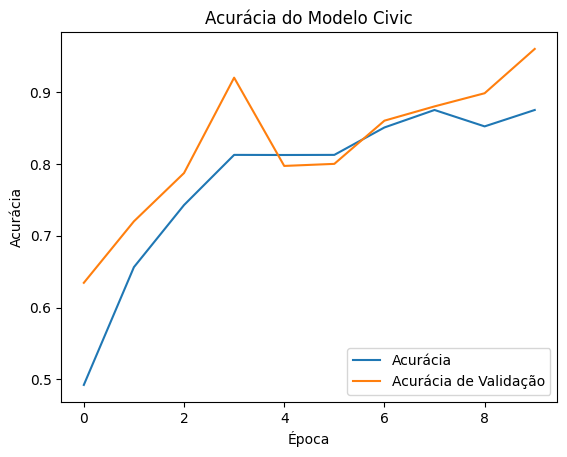

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Acurácia')  # Label da linha de acurácia
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')  # Label da linha de acurácia de validação
plt.xlabel('Época')  # Label do eixo x
plt.ylabel('Acurácia')  # Label do eixo y
plt.title('Acurácia do Modelo Civic')  # Título do gráfico
plt.legend(loc='lower right')
plt.show()

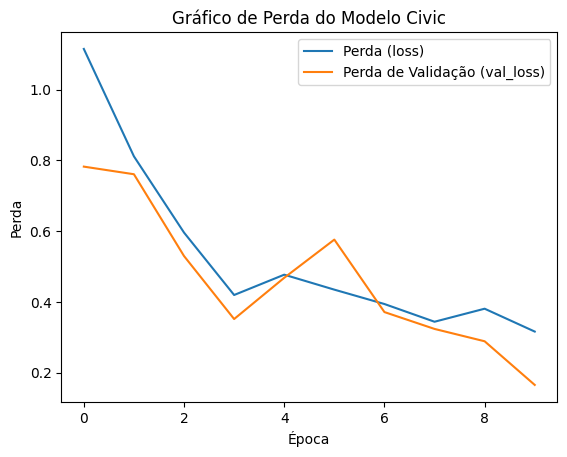

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Perda (loss)')
plt.plot(history.history['val_loss'], label='Perda de Validação (val_loss)')
plt.title('Gráfico de Perda do Modelo Civic')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend(loc='upper right')  # Ajusta a posição da legenda para melhor visualização
plt.show()

#Referências

HARRIS, C. R.; MILLMAN, K. J.; VAN DER WALT, S. J. et al. Array programming with NumPy. Nature, v. 585, n. 7825, p. 357–362, set. 2020. Disponível em: https://www.nature.com/articles/s41586-020-2649-2. Acesso em: 17 out 2024.

HUNTER, J. D. Matplotlib: A 2D graphics environment. Computing in Science & Engineering, v. 9, n. 3, p. 90–95, maio/jun. 2007. Disponível em: https://ui.adsabs.harvard.edu/abs/2007CSE.....9...90H/abstract. Acesso em: 19 out 2024.

MCKINNEY, W. Data structures for statistical computing in Python. In: PROCEEDINGS OF THE 9TH PYTHON IN SCIENCE CONFERENCE, 2012, Austin, TX. Proceedings. Austin, TX: SciPy, 2012. p. 56–61. Disponível em: https://proceedings.scipy.org/articles/Majora-92bf1922-00a. Acesso em: 27 set 2024.

PEDREGOSA, F.; VAROQUAUX, G.; GRAMFORT, A. et al. Scikit-learn: machine learning in Python. Journal of Machine Learning Research, v. 12, p. 2825–2830, nov. 2011. Disponível em: https://www.jmlr.org/papers/volume12/pedregosa11a/pedregosa11a.pdf. Acesso em: 29 set 2024.

TensorFlow. Disponível em: https://www.tensorflow.org/guide?hl=pt-br. Acesso em: 15 maio 2023.